Dataset shape: (199, 7)
     ProductName   Brand   Price  DiscountPrice Quantity             Category  \
0  Onion (Loose)  Fresho   69.75           52.0     2 kg  Fruits & Vegetables   
1          Onion  Fresho  174.35          130.0     5 kg  Fruits & Vegetables   
2  Onion (Loose)  Fresho   34.87           26.0     1 kg  Fruits & Vegetables   
3          Onion  Fresho   69.74           52.0     2 kg  Fruits & Vegetables   
4  Onion (Loose)  Fresho  174.37          129.0     5 kg  Fruits & Vegetables   

              SubCategory  
0  Potato, Onion & Tomato  
1  Potato, Onion & Tomato  
2  Potato, Onion & Tomato  
3  Potato, Onion & Tomato  
4  Potato, Onion & Tomato  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ProductName    199 non-null    object 
 1   Brand          199 non-null    object 
 2   Price          199 non-null    float

None


Missing values per column:
ProductName      0
Brand            0
Price            0
DiscountPrice    0
Quantity         0
Category         0
SubCategory      0
dtype: int64
             Price  DiscountPrice
count   199.000000     199.000000
mean    368.317437     282.107688
std     648.671693     426.622092
min       5.000000       5.000000
25%      69.745000      57.500000
50%     174.370000     139.000000
75%     387.000000     328.385000
max    6000.000000    3060.000000
Duplicates count: 0
  Quantity   Price  DiscountPrice  Saved  DiscountPct
0     2 kg   69.75           52.0  17.75    25.448029
1     5 kg  174.35          130.0  44.35    25.437339
2     1 kg   34.87           26.0   8.87    25.437339
3     2 kg   69.74           52.0  17.74    25.437339
4     5 kg  174.37          129.0  45.37    26.019384


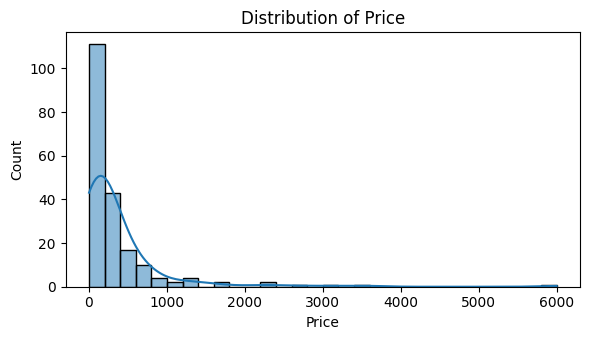

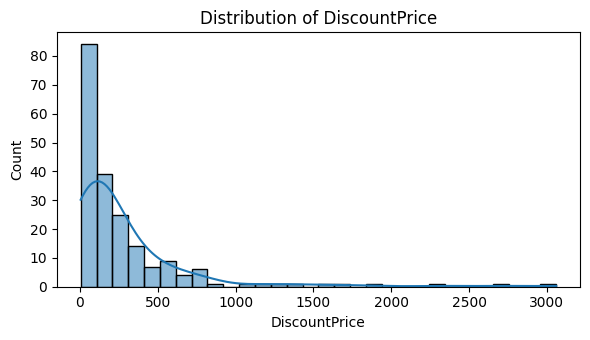

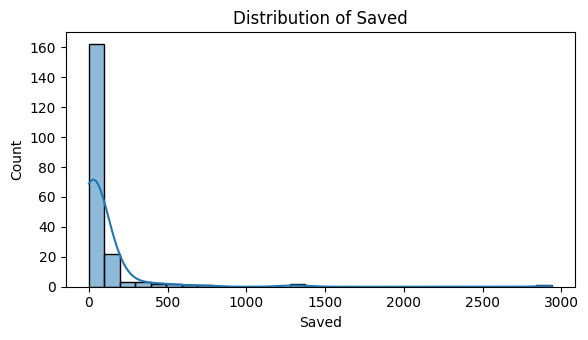

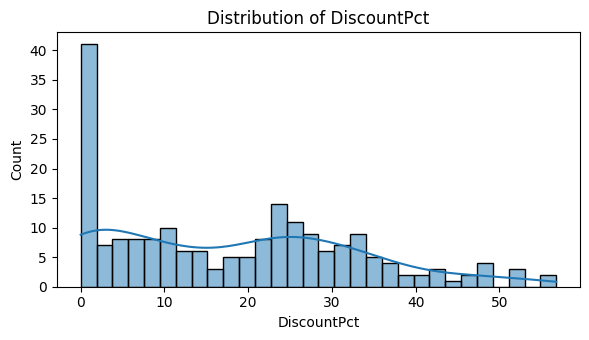

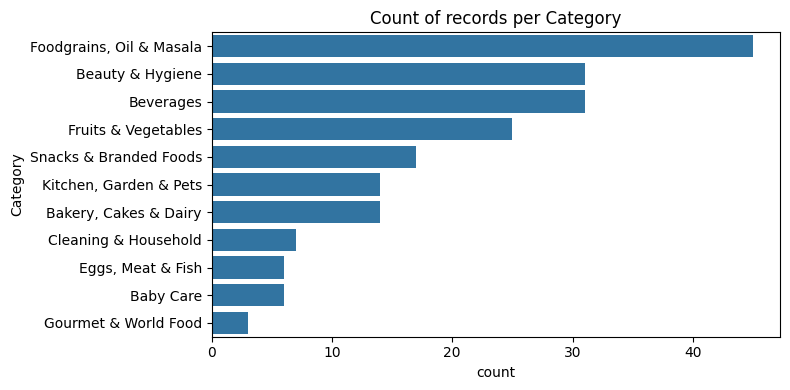

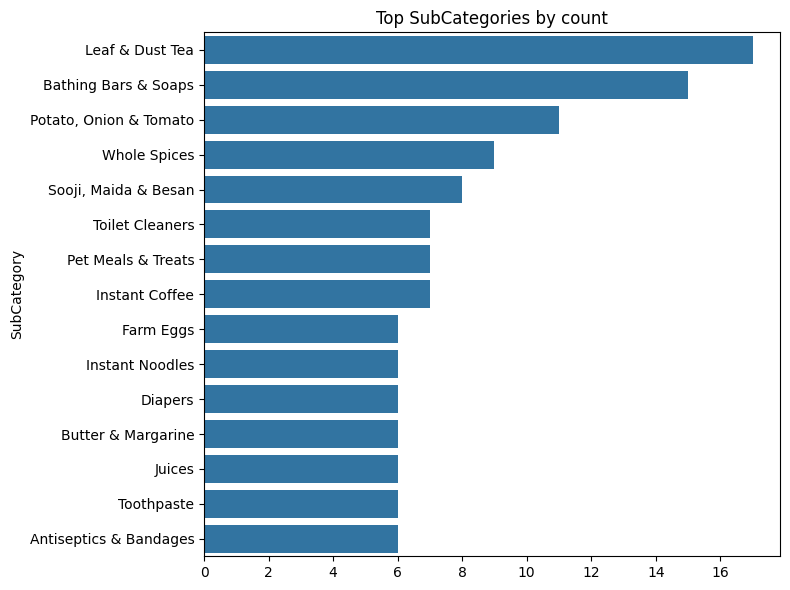

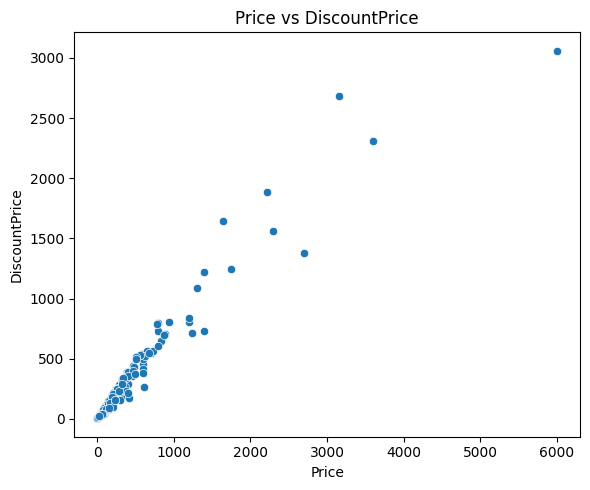

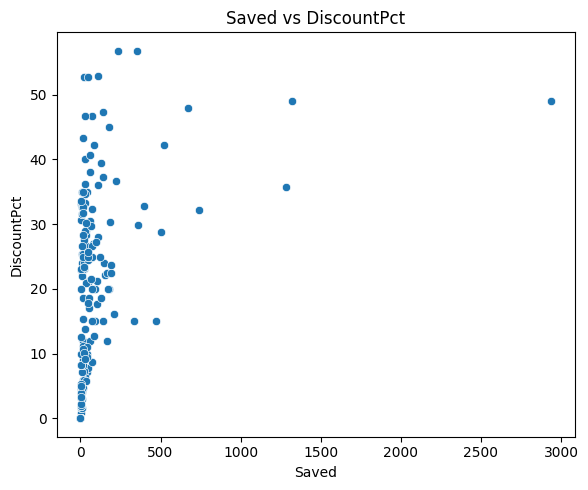

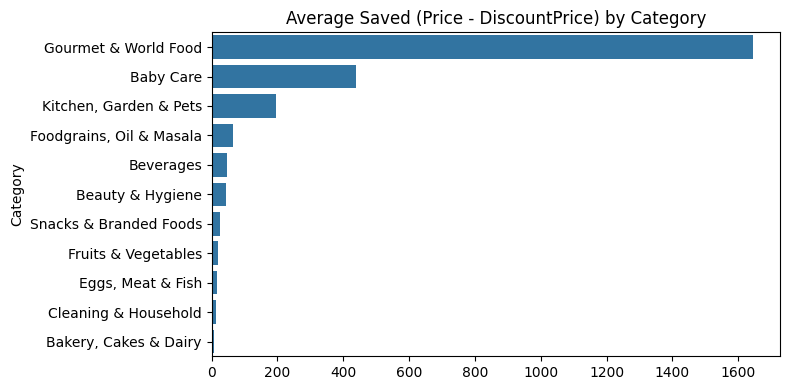

,ProductName,Brand,Price,DiscountPrice,Saved,DiscountPct
69,Extra Virgin Olive Oil,BORGES,6000.00,3060.00,2940.0,49.000000
198,"Premium Care Diaper Pants - Large, 9-14 kg, Lo...",Pampers,3597.00,2311.00,1286.0,35.752016
92,"Dry Pet Food - For Adult Dogs, Chicken & Veget...",Pedigree,3160.00,2686.00,474.0,15.000000
70,Original Extra Virgin Olive Oil,BORGES,2700.00,1377.00,1323.0,49.000000
195,Premium Care Diapers - Large,Pampers,2299.00,1559.50,739.5,32.166159
93,"Dry Pet Food - For Adult Dogs, Chicken & Veget...",Pedigree,2220.00,1887.00,333.0,15.000000
60,Sona Masoori Raw Rice/Akki,BB Royal,1750.00,1245.00,505.0,28.857143
97,Antiseptic Disinfectant Liquid,Dettol,1641.59,1641.59,0.0,0.000000
68,Original Extra Virgin Olive Oil,BORGES,1400.00,728.00,672.0,48.000000
90,"Dry Pet Food - For Adult Dogs, Chicken & Veget...",Pedigree,1390.00,1223.20,166.8,12.000000


,ProductName,Brand,Price,DiscountPrice,Saved,DiscountPct
170,H2O Unbreakable Water Bottle - Blue,Cello,618.00,267.0,351.00,56.796117
171,H2O Unbreakable Water Bottle - Blue,Cello,412.00,178.0,234.00,56.796117
180,"Premium Stainless Steel Kitchen Knife - Large,...",BB Home,210.00,99.0,111.00,52.857143
167,Ridge Gourd,Fresho,90.91,43.0,47.91,52.700473
166,Ridge Gourd,Fresho,45.45,21.5,23.95,52.695270
69,Extra Virgin Olive Oil,BORGES,6000.00,3060.0,2940.00,49.000000
70,Original Extra Virgin Olive Oil,BORGES,2700.00,1377.0,1323.00,49.000000
68,Original Extra Virgin Olive Oil,BORGES,1400.00,728.0,672.00,48.000000
160,Mustard/Sasive/Rai - Small,BB Royal,300.00,158.0,142.00,47.333333
161,Mustard/Sasive/Rai - Small,BB Royal,60.00,32.0,28.00,46.666667


,Brand,Count
0,Fresho,41
1,BB Royal,38
2,Dettol,12
3,Dove,9
4,Red Label,8
5,Harpic,7
6,Pedigree,7
7,Nescafe,7
8,Amul,6
9,Colgate,6


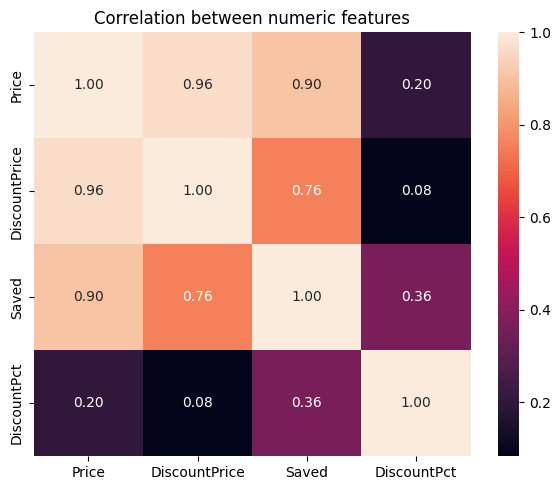

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"C:\Users\HP\OneDrive\Documents\Sales.csv", encoding='latin1')
print("Dataset shape:", df.shape)
print(df.head())
display(df.info())
print('\nMissing values per column:')
print(df.isnull().sum())

print(df.describe())
df['Saved'] = df['Price'] - df['DiscountPrice']
df['DiscountPct'] = (df['Saved'] / df['Price']).replace([np.inf, -np.inf], np.nan) * 100
dups = df.duplicated().sum()

print("Duplicates count:", dups)
print(df[['Quantity','Price','DiscountPrice','Saved','DiscountPct']].head())
numeric_cols = ['Price','DiscountPrice','Saved','DiscountPct']

for col in numeric_cols:
    plt.figure(figsize=(6,3.5))
    plt.title(f'Distribution of {col}')
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.tight_layout()
    plt.show()

# Category counts
plt.figure(figsize=(8,4))
plt.title('Count of records per Category')
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
plt.title('Top SubCategories by count')
top_sub = df['SubCategory'].value_counts().nlargest(15)
sns.barplot(x=top_sub.values, y=top_sub.index)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,5))
sns.scatterplot(x='Price', y='DiscountPrice', data=df)
plt.title('Price vs DiscountPrice')
plt.tight_layout()
plt.show()

# Scatter: Saved vs DiscountPct
plt.figure(figsize=(6,5))
sns.scatterplot(x='Saved', y='DiscountPct', data=df)
plt.title('Saved vs DiscountPct')
plt.tight_layout()
plt.show()

# Average Saved by Category
cat_saved = df.groupby('Category')['Saved'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x=cat_saved.values, y=cat_saved.index)
plt.title('Average Saved (Price - DiscountPrice) by Category')
plt.tight_layout()
plt.show()
display(df.sort_values('Price', ascending=False).head(10)[['ProductName','Brand','Price','DiscountPrice','Saved','DiscountPct']])

# Top products by DiscountPct (with minimum Price to avoid tiny prices)
display(df[df['Price']>10].sort_values('DiscountPct', ascending=False).head(10)[['ProductName','Brand','Price','DiscountPrice','Saved','DiscountPct']])

# Brands with most records
display(df['Brand'].value_counts().head(15).rename_axis('Brand').reset_index(name='Count'))

plt.figure(figsize=(6,5))
corr = df[['Price','DiscountPrice','Saved','DiscountPct']].corr()
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Correlation between numeric features')
plt.tight_layout()
plt.show()